In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#load dataset 
df=pd.read_csv("food_items.csv")
#inspect the dataset
print("Dataset Overview")
print(df.head())
print("\ndatset Info")
print(df.info())

Dataset Overview
   Calories  Total Fat  Saturated Fat  Monounsaturated Fat  \
0     149.0          0            0.0                  0.0   
1     123.0          0            0.0                  0.0   
2     150.0          0            0.0                  0.0   
3     110.0          0            0.0                  0.0   
4     143.0          0            0.0                  0.0   

   Polyunsaturated Fat  Trans Fat  Cholesterol  Sodium  Total Carbohydrate  \
0                  0.0        0.0            0     9.0                 9.8   
1                  0.0        0.0            0     5.0                 6.6   
2                  0.0        0.0            0     4.0                11.4   
3                  0.0        0.0            0     6.0                 7.0   
4                  0.0        0.0            0     7.0                13.1   

   Dietary Fiber  Sugars  Sugar Alcohol  Protein  Vitamin A  Vitamin C  \
0            0.0     0.0              0      1.3          0        

In [3]:
X_raw=df.iloc[:, :-1]
y_raw=df.iloc[:, -1:]
X_raw

Calories  Total Fat  Saturated Fat  Monounsaturated Fat  \
0         149.0          0            0.0                  0.0   
1         123.0          0            0.0                  0.0   
2         150.0          0            0.0                  0.0   
3         110.0          0            0.0                  0.0   
4         143.0          0            0.0                  0.0   
...         ...        ...            ...                  ...   
13255     140.0          5            1.0                  0.0   
13256     130.0          4            0.5                  0.0   
13257     140.0          3            0.0                  0.0   
13258     140.0          3            0.5                  0.0   
13259     120.0          4            0.5                  0.0   

       Polyunsaturated Fat  Trans Fat  Cholesterol  Sodium  \
0                      0.0        0.0            0     9.0   
1                      0.0        0.0            0     5.0   
2                      0.0        0.0            0     4.0   
3                      0.0        0.0            0     6.0   
4                      0.0        0.0            0     7.0   
...                    ...        ...          ...     ...   
13255                  0.0        0.0            0    60.0   
13256                  0.0        0.0            0    50.0   
13257                  0.0        0.0            0   130.0   
13258                  0.0        0.0            0    55.0   
13259                  0.0        0.0            0    55.0   

       Total Carbohydrate  Dietary Fiber  Sugars  Sugar Alcohol  Protein  \
0                     9.8            0.0     0.0              0      1.3   
1                     6.6            0.0     0.0              0      0.8   
2                    11.4            0.0     0.0              0      1.3   
3                     7.0            0.0     0.0              0      0.8   
4                    13.1            0.0     0.0              0      1.0   
...                   ...            ...     ...            ...      ...   
13255                23.0            2.0    13.0              0      2.0   
13256                23.0            1.0    14.0              0      2.0   
13257                26.0            2.0    15.0              0      1.0   
13258                27.0            2.0    17.0              0      1.0   
13259                23.0            2.0    13.0              0      2.0   

       Vitamin A  Vitamin C  Calcium  Iron  
0              0          0        0     0  
1              0          0        0     0  
2              0          0        0     0  
3              0          0        0     0  
4              0          0        0     0  
...          ...        ...      ...   ...  
13255          0          0        0     4  
13256          0          0        0     4  
13257          0          0        0     2  
13258          0          0        0     2  
13259          0          0        0     4  

[13260 rows x 17 columns]

In [4]:
scaler=MinMaxScaler()
X=scaler.fit_transform(X_raw)

In [5]:
label_encoder=LabelEncoder()
y=label_encoder.fit_transform(y_raw.values.ravel())
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y,random_state=123)

In [6]:
penalty='l2'
multi_class='multnomial'
solver='lbfgs'
max_iter=1000

In [7]:
model = LogisticRegression(max_iter=2000)  # Increased max_iter for convergence
model.fit(X_train, y_train)

LogisticRegression(max_iter=2000)

In [8]:
# Model Prediction
y_pred = model.predict(X_test)

In [9]:
# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Model Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Model Accuracy: 0.774132730015083
Confusion Matrix:
 [[1160  163    7]
 [ 301  823    0]
 [ 128    0   70]]
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.87      0.79      1330
           1       0.83      0.73      0.78      1124
           2       0.91      0.35      0.51       198

    accuracy                           0.77      2652
   macro avg       0.82      0.65      0.69      2652
weighted avg       0.79      0.77      0.77      2652



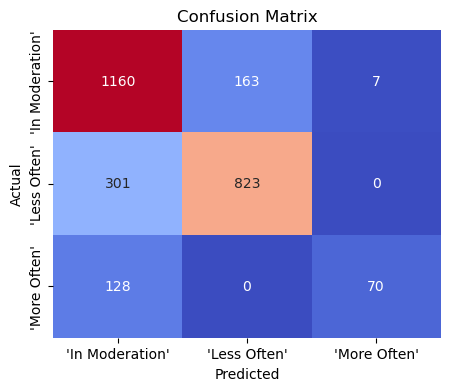

In [10]:
# Confusion Matrix Plot
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='coolwarm', cbar=False, 
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()